# sprint2-ml-scratch-linear-regression

# 前提知識の説明

## 教師あり学習

機械学習の代表的な手法で、機械に質問と回答を同時に教えて学習させる方法です。
学習用のデータには正解がラベルとして振り分けられていて、それを使用して、「このカテゴリーに属するデータはどのようなものか」を学習します。「分類問題」はデータを分類する場合に、飛び飛び（離散）の値を持つカテゴリーに分類する問題であるのに対して、予測する値が連続的な値をとる場合を「回帰問題」といいます。  
<b>長所</b>  
分類問題では効率的に学習できる  
<b>短所</b>  
膨大なラベル付きデータを用意するのに手間とコストがかかるという短所があります。

## 教師なし学習
「教師なし学習」とは、入力データはあるけれど、その正解データは与えられないものです。推論、分析など、正解がない、正解が解らない問題で学習する手法を教師なし学習と呼びます。
正解がない予測や分析、解析などの分野で使われたり、膨大なデータの中からコンピュータ自身に何かを発見させたり。膨大な訓練データを繰り返して学習させたりする際などに用いられます。教師あり学習の前処理としても使用されます。

<b>長所と短所</b>　   
機械自身が特徴や定義を発見するため、データが膨大にあれば、正解のデータを用意する必要や手間がないという長所があります。一方短所としては、正解がない代わりに報酬（得点）などを設定する必要があります。

## 半教師あり学習

「半教師あり学習」とは「教師あり学習」と「教師なし学習」を混在させる方法もあります。まずは機械に対して教師なし学習で特徴量を学ばせて、それ以降は教師あり学習で膨大な訓練データを与え、自動的に特徴量を算出させながら繰り返し学習する方法です。


## 強化学習

「強化学習」は、学習する主体（コンピュータ）が、そのおかれた周囲の「環境」とやり取りすることで性能と高めていく技術です。その「やり取り」の部分が通常の機械学習とは大きく異なります。すなわち、通常の機械学習とは異なり学習用データを準備する必要はなく、機会自身が周りの環境とのやりとりでデータを収集し学習していく手法です。世紀の囲碁対決で知られるGoogleの「AlphaGo」でも用いられたのも「強化学習」です。  
<b>長所</b>  
 開発の上ではとても効率的な一面があります。例えば、自転車に乗れるロボットを開発する場合、プログラミングやコーディングで姿勢の制御を行おうとした場合、あらゆる事態を想定してプログラミングすることが理想となり、膨大な時間とコストがかかります。これを「強化学習」で行うと、人間があらゆる状況や事態を想定してプログミングするのではなく、ロボットが自律的に学習するため、人的な開発コストや労力は大幅に削減することが期待できます。

## データ・セットの用意

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.random import*
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
train_df= pd.read_csv('./train.csv')

 ## プロット
 ### 1

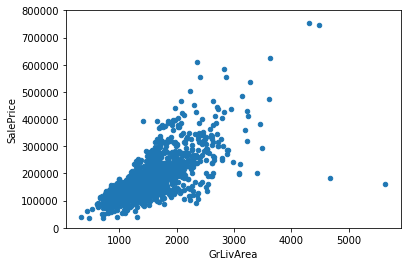

In [44]:
#散布図 grlivarea/saleprice

var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

外れ値を削除しています。

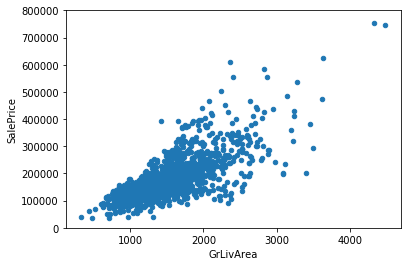

In [45]:
#点を削除する
train_df.sort_values(by = 'GrLivArea', ascending = False)[:2]
train_df = train_df.drop(train_df[train_df['Id'] == 1299].index)
train_df = train_df.drop(train_df[train_df['Id'] == 524].index)
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### 2

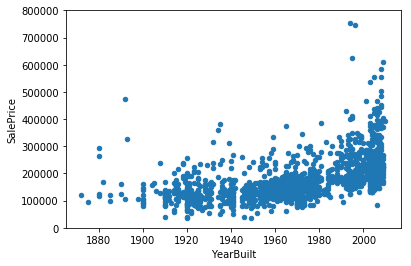

In [46]:
#散布図 YearBuilt/saleprice
var = 'YearBuilt'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# フィーチャースケーリングとは

### ①正規化とは
特徴量の値の範囲を一定の範囲におさめる変換である。
主に[0, 1]か、[-1, 1]の範囲内におさめることが多い。

### ②標準化とは
特徴量の平均を0、分散を1にする変換である。

### ③正規化と標準化の使い分け
基本は、標準化を用いる。理由は、正規化は外れ値が強く影響してしまうため。
- 正規化
  - 使うとき:
    - 画像処理におけるRGBの強さ[0,255]
    - sigmoid, tanhなどの活性化関数を用いる、NNのいくつかのモデル
- 標準化  
  - 使うとき: 
    - ロジスティック回帰、SVM、NNなど勾配法を用いたモデル
    - kNN, k-meansなどの距離を用いるモデル
    - PCA, LDA, kernel PCA などのfeature extractionの手法

<b>使わないとき:</b>  
決定木、random forest

### フィーチャースケーリングのメリット 

勾配降下法などの距離を用いて学習させるモデルの場合、特徴量のスケーリングを行うことで、最適な解決法を見つけるまでのステップがすくなくなるというメリットがあります。  
一方、分類問題においてもメリットがあり、例えばロジスティック回帰で学習させる前に特徴量にスケーリングを施し、学習を行えば、スケーリングを行わない場合よりも分類の精度がよくなります。

# 数式の実装


## 線形回帰における、目的関数(コスト関数)を実装

$ h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... +\theta_n x_n   (x_0 = 1)\\ $


$ J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2 $

In [55]:
import matplotlib.pyplot as plt

x1 = np.array(train_df['GrLivArea']).reshape(-1,1)
x2 = np.array(train_df['YearBuilt']).reshape(-1,1)
y = train_df['SalePrice']
X = np.concatenate((x1,x2), axis=1)

min = X.min(axis=None, keepdims=True)
max = X.max(axis=None, keepdims=True)
X = (X-min)/(max-min)
X=np.insert(X,0,1,axis=1)

In [56]:
#yをarray変換
y = y.values
#y_numを正規化
min = y.min(axis=None, keepdims=True)
max = y.max(axis=None, keepdims=True)
Y = (y-min)/(max-min)
Y

array([0.24107763, 0.20358284, 0.26190807, ..., 0.321622  , 0.14890293,
       0.15636717])

In [57]:
# コスト関数
def compute_cost(X, y, theta):
    m=len(y)
    h=np.dot(X,theta).flatten()
    J = 1/(2*m)*np.sum(np.square(h - y)) 
    return J
np.random.seed(seed=10)
theta=np.random.rand(3,1)
compute_cost(X, Y,theta)

0.34584847560458537

In [58]:
np.random.seed(seed=10)
theta=np.random.rand(3,1)
theta

array([[0.77132064],
       [0.02075195],
       [0.63364823]])

 ## $θ_{0}$ の役割

線形回帰モデルで、θ_{0}の切片項があることによって、モデルの表現力をあげる効果がある。たとえば、モデルの予測値と目的変数との誤差を切片を加えて縮小させる工夫が可能になる。

## 最急降下法(勾配降下法、GradientDescent)

$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}] $

In [59]:
def gradient_descent(X,y,theta,iterations,alpha):
    """
    args:
      alpha: Step size/Learning rate
      iterations: No. of iterations(Number of iterations)
    """
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        m=len(X)
        h=np.dot(X,theta).flatten()
        theta -= (alpha/m)*(np.sum(np.dot(h-y,X)))
        past_costs.append(compute_cost(X, y, theta))
        past_thetas.append(theta)
    return past_costs#, past_thetas


In [60]:
gradient_descent(X,Y,theta,500,0.01)

[0.3272013998122734,
 0.3095968045170233,
 0.29297640896753313,
 0.27728519064705065,
 0.26247120311902217,
 0.2484854040562356,
 0.23528149288413863,
 0.22281575750084393,
 0.21104692956638235,
 0.1999360478821317,
 0.18944632940813455,
 0.17954304749130082,
 0.17019341690136627,
 0.16136648529401196,
 0.15303303074182995,
 0.14516546499390653,
 0.13773774214376033,
 0.13072527240327594,
 0.12410484069717895,
 0.11785452980855508,
 0.11195364782098442,
 0.10638265961708368,
 0.10112312220668061,
 0.09615762367052144,
 0.0914697255173815,
 0.08704390826375046,
 0.08286552005593109,
 0.07892072816446286,
 0.07519647319029071,
 0.07168042583107666,
 0.06836094606452699,
 0.0652270446136104,
 0.06226834656609505,
 0.059475057027966495,
 0.05683792869702017,
 0.05434823124927933,
 0.05199772243689141,
 0.049778620801820606,
 0.04768357991500466,
 0.04570566405569318,
 0.043838325250453156,
 0.04207538159582822,
 0.04041099679288785,
 0.03883966082591492,
 0.03735617172126752,
 0.0359556183

### 線形回帰における最急降下法の導出式を記述せよ

$ \theta_j := \theta_j - \frac{\partial}{\partial \theta_j}J(\theta) \\ $
-① を変形していく。

$ h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... +\theta_n x_n   (x_0 = 1)\\ $,
$ J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2 $

であり、①を$J(\theta)$を各 $\theta_j $について偏微分を行うため、$J(\theta)$に合成関数の偏微分を考えると、

$u=J(\theta) $  
$v=h_\theta(x)$  
とすると、
$ \frac{\partial  u }{\partial \theta_0}=\frac{\partial  u }{\partial \ v}\frac{\partial  v}{\partial \theta_0}$
であり、
$x^{(i)}_0=1$であることを踏まえて、

$\frac{\partial  u }{\partial \ v}=\frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})$

$\frac{\partial  v}{\partial \theta_0}=x^{(i)}_0$

となり、



$ \frac{\partial  u }{\partial \theta_0}=\frac{\partial  u }{\partial \ v}\frac{\partial  v}{\partial \theta_0}=
\frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})x^{(i)}_0  $

$\frac{\partial  v}{\partial \theta_1}=x^{(i)}_1$
であるから、
    
$ \frac{\partial  u }{\partial \theta_1}=\frac{\partial  u }{\partial \ v}\frac{\partial  v}{\partial \theta_1}=
\frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})x^{(i)}_1
$

よって一般的に

$ \frac{\partial  u }{\partial \theta_j}=\frac{\partial  u }{\partial \ v}\frac{\partial  v}{\partial \theta_j}=
\frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j
$
となる。

よって①は、


$\theta_j := \theta_j - \frac{\partial}{\partial \theta_j}J(\theta) =\theta_j-\frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j\\
$

ここで 
$\frac{1 }{ m}$ を$α$（正の定数）に置き換えると

$\theta_j := \theta_j - \alpha \sum_{i=1}^m (h_\theta (x^{(i)}) - y^{(i)}) x_j ^{(i)}$

となる

### 最急降下法について、なぜ局所最適解が得られる場合があるか答えよ


最急降下法を特に高次多項式に適用する場合、接線の傾きが０になる箇所が複数存在するため、最適解を求めていくときに、回帰を始める特徴値の値によっては、最適解ではない場所により収束してしまい、局所最適解を取得してしまう可能性があるためです。  
一方、線形回帰の場合(特に最小二乗法)を考えます。この場合下に一回だけ凸の二次曲線で回帰を行います。そのため、最も最小化になる点は一つだけのため、最適解が得られます。

# 学習

## 学習率

機械学習ライブラリの一つであるChainerの学習率はデフォルトで「0.01」に設定されているなど、学術論文においてもモデル評価で０．０１に設定されている場合が多い。
http://db-event.jpn.org/deim2018/data/papers/363.pdf

また学習率は、最急降下法の用いてどれだけ大きくパラメータの更新を行うかを決めるハイパーパラメータであり、値が小さすぎると収束までに時間がかかりすぎる一方で、反対に大きすぎると発散して正しい値に収束しなくなる。そこで学習曲線にプロットし学習時間が遅いか、発散していないか確認し、学習率を調整していく必要がある。  


## 学習曲線について述べよ

学習曲線とは、学習の進行過程を数量的にグラフに示したもの。  
普通横軸に試行回数，試行時間などをとる。この場合縦軸に学習の測度として正反応数，反応の大きさ，作業量など学習の進行とともに増加するものをとれば学習曲線は上昇曲線となり，作業時間，誤反応数，反応潜時など学習の進行とともに減少するものをとれば下降曲線となる。  
そこで、トレーニングデータと検証用データを学習曲線にプロットして、二つの曲線の幅がデータ数が増えれば狭まるか、開きが変わらないのか確認でき、Overfitting（過学習）か、 Underfitting（未学習）かを診断するために持ちられるツールになっている。  
 >https://chezou.hatenablog.com/entry/2016/05/29/215739

## 学習曲線のプロット

In [61]:
past_costs=gradient_descent(X,y,theta,500,0.01)

No handles with labels found to put in legend.


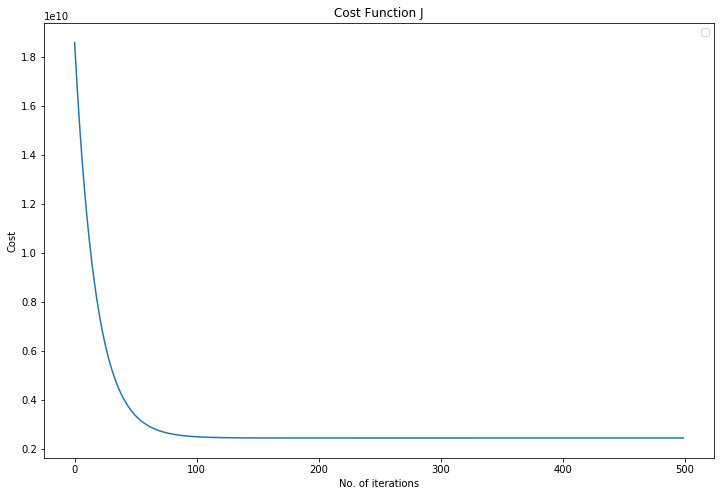

In [62]:
def cost_plot(costs):
        plt.figure(figsize=(12,8))
        plt.title("Cost Function J")
        # Plot lines
        plt.xlabel('No. of iterations')
        plt.ylabel('Cost')
        plt.legend()
        plt.plot(costs)
        # Visualize
        
cost_plot(past_costs)

### クラス化

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.random import*
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

class LinearModel:
    def __init__(self,X, y, theta, iterations, alpha): 
            self.X=X
            self.y=y
            self.theta=theta
            self.iterations=iterations
            self.alpha=alpha
    
    def compute_cost(self,X,y,theta): #コスト関数
            m=len(self.y)
            h=np.dot(self.X,self.theta).flatten()
            J = 1/(2*m)*np.sum(np.square(h - self.y)) 
            return J

    def gradient_descent(self,X,y,theta,iteration, alpha):#,X,y,theta,iteration, alpha): 最急降下法
        past_costs = []
        past_thetas = [self.theta]
        for i in range(self.iterations):
            m=len(X)
            h=np.dot(X,self.theta).flatten()
            self.theta -= (self.alpha/m)*(np.sum(np.dot(h-self.y,self.X)))
            past_costs.append(self.compute_cost(self.X, self.y, self.theta))
            past_thetas.append(self.theta)
            
        return  past_costs #, past_thetas
        
    def plot_learning_curve(self,X,y,theta,iteration, alpha):#,X,y,theta,iteration, alpha):# 学習曲線のプロット
        plt.figure(figsize=(12,8))
        plt.title("Cost Function J")
        # Plot lines
        plt.xlabel('No. of iterations')
        plt.ylabel('Cost')
        plt.legend()
        plt.plot(self.gradient_descent(self.X, self.y, self.theta, self.iterations, self.alpha))
        # Visualize
        


No handles with labels found to put in legend.


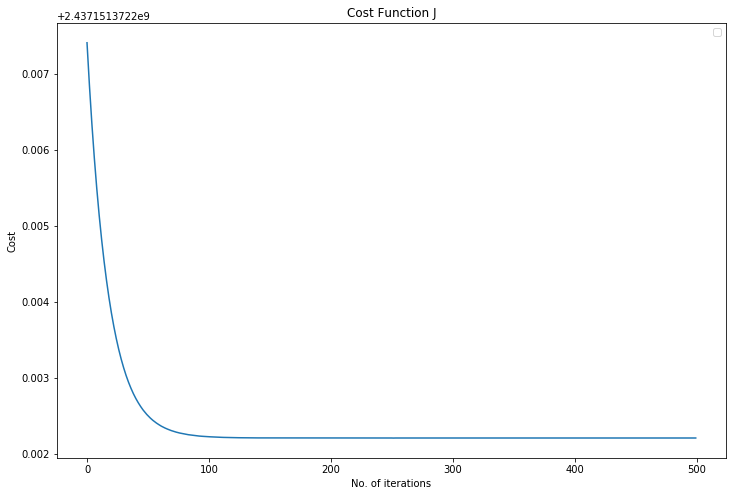

In [18]:
alpha=0.01
iteration=500
np.random.seed(seed=10)
theta=np.random.rand(3,1)
model=LinearModel(X,y,theta,iteration, alpha) 
model.compute_cost(X,y,theta) 
model.gradient_descent(X,y,theta,iteration, alpha)
model.plot_learning_curve(X,y,theta,iteration, alpha)

### 正規方程式について


\begin{eqnarray} 
\frac{\partial}{\partial \theta_j}J(\theta) &=& \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)} \\ 
&=& \frac{1}{m}\{\sum_{k}\theta_k\sum_{i}x_j^{(i)}x_k^{(i)} - \sum_{i}x_j^{(i)}y^{(i)}\} 
\end{eqnarray}

これを mm 行まとめて変形して行列で書き直すと

$
m\left[\begin{array}{cc} 
\frac{\partial}{\partial \theta_0}J(\theta)\\ 
\frac{\partial}{\partial \theta_1}J(\theta)\\ 
\vdots\\ 
\frac{\partial}{\partial \theta_n}J(\theta) 
\end{array}\right] = 
X^TX \theta - X^Ty
$

これを =0とおいて θ について解く訳なので

$
\begin{eqnarray} 
X^TX \theta &=& X^Ty\\ 
\theta &=& (X^TX)^{-1} X^Ty 
\end{eqnarray}
$

右辺が正規方程式になる。  
<b>メリット</b>  
$X$を$m \times n$行列 (m > n)とした場合、$X^TX$ は n×n の正方行列になり、さらにほぼ可逆になるので、高速に逆行列が計算されるメリットがある。

<b>デメリット</b>  
非常に大きなデータセットを扱っている場合は、逆行列$ (X^TX)^{-1} $を求める時に計算コストが高くなることがある。

# テスト

In [26]:
# コスト関数のテスト

def compute_cost(X,y,theta): #コスト関数
        m=len(y)
        h=np.dot(X,theta).flatten()
        J = 1/(2*m)*np.sum(np.square(h - y)) 
        if J == 0.34584847560458537:
            print("CORRECT")
            return True

        else:
            print("INCORRECT")
            return False
        
np.random.seed(seed=10)
theta=np.random.rand(3,1)
compute_cost(X, Y,theta)

CORRECT


True

## GradientDescentテスト　
学習率0.01
イテレーション５００回

In [82]:
import numpy as np

#最急降下法のテスト
def gradient_descent(X,y,theta,iterations,alpha):

    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        m=len(X)
        h=np.dot(X,theta).flatten()
        theta -= (alpha/m)*(np.sum(np.dot(h-y,X)))
        past_costs.append(compute_cost(X, y, theta))
        past_thetas.append(theta)
    return past_costs


In [94]:
np.random.seed(seed=10)
theta=np.random.rand(3,1)
alpha=0.01
iteration=500
past_costs = gradient_descent(X,Y,theta,iteration,alpha)

if past_costs[-1] == 0.012304167980450652:
    print("CORRECT")
else:
    print("INCORRECT")


CORRECT
